<img src="KITlogo_1c_deutsch-eps-converted-to.pdf" width="200" height="200" align="right"/>

##### Lehrstuhl für Analytics and Statistics (IOR)
##### Prof. Dr. Oliver Grothe
##### SoSe 2024

# Analyse multivariater Daten
## Übung 11

In [2]:
# imports
import pandas as pd # data structures
import numpy as np # large, multi-dimensional arrays and matrices
import matplotlib.pyplot as plt # plotting library
from mpl_toolkits.mplot3d import Axes3D # 3d plots

import statsmodels.api as sm 
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn.linear_model import LinearRegression



In [3]:
%matplotlib widget
#%matplotlib notebook

## Beispiel: Werbedatensatz

Betrachten Sie zunächst die Daten und nutzen Sie die Lineare Regression um die Fragen zu beantworten. 

In [4]:
# read data into a Panda DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


Was sind die unabhängigen Merkmale?
- TV: Kosten für TV-Werbung für ein einzelnes Produkt an einem bestimmten Markt (in tausend Dollar)
- Radio: Kosten für Radio-Werbung
- Newspaper: Kosten für Werbung in Zeitung

Was ist das abhängige Merkmal?
- Sales: Verkaufszahlen eines einzelnen Produkts an einem festen Markt (in tausend Geräten)

In [6]:
# print the shape of the DataFrame
data.shape

(200, 4)

Es gibt 200 Beobachtungen, also 200 Märkte im Datensatz.

In [7]:
# is there missing data?
data.isnull().values.any()

False

In [8]:
# some desciptive statictics
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
# have a look at the data points with the largest sales
data[data.sales > 24]

,TV,radio,newspaper,sales
18,281.4,39.6,55.8,24.4
37,266.9,43.8,5.0,25.4
62,261.3,42.7,54.7,24.2
99,289.7,42.3,51.2,25.4
129,220.3,49.0,3.2,24.7
148,243.2,49.0,44.3,25.4
176,276.9,48.9,41.8,27.0
184,287.6,43.0,71.8,26.2
199,283.6,42.0,66.2,25.5


In [10]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: xlabel='newspaper', ylabel='sales'>

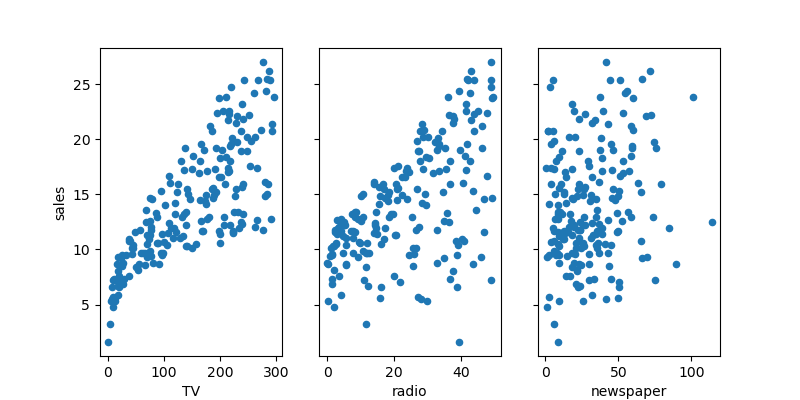

In [11]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(8, 4))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

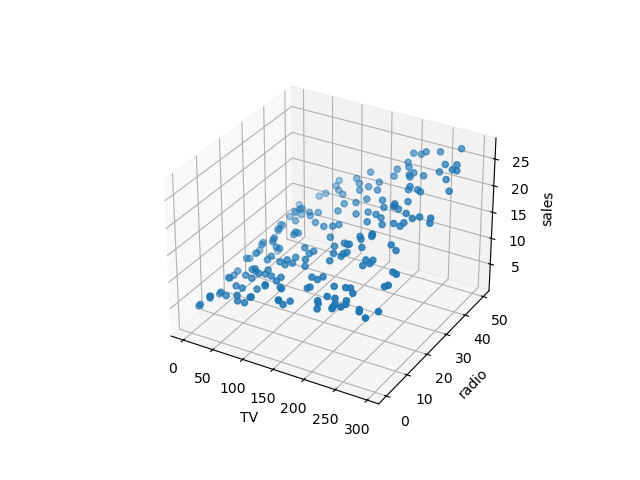

In [25]:
%matplotlib widget
threedee = plt.figure()
ax = threedee.add_subplot(projection='3d')
ax.scatter(data.TV, data.radio, data.sales)
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()


## Fragen zur Anwendung der linearen Regression 

1. Gibt es einen Zusammenhang zwischen Werbung und Verkäufen?
2. Wie stark ist dieser Zusammenhang?
3. Welche Art der Werbung trägt zum erhöhten Verkauf bei?
4. Was ist der Effekt der einzelnen Werbetypen auf die Verkäufe?
5. Für gegebene Werbeinvestitionen eines Marktes, kann der Verkauf vorhergesagt werden?

## Multiple Lineare Regression

Wir schätzen ein Modell der Form:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

über Statsmodels.

Jedes $x$ steht für ein anderes Feature, wovon jeder seinen eigenen Koeffizienten hat. In diesem Fall ist:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [13]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [14]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           1.58e-96
Time:                        22:49:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Wie lassen sich diese Koeffizienten interpretieren? 

- TV und Radio haben signifikante **p-values**
- Newspaper nicht

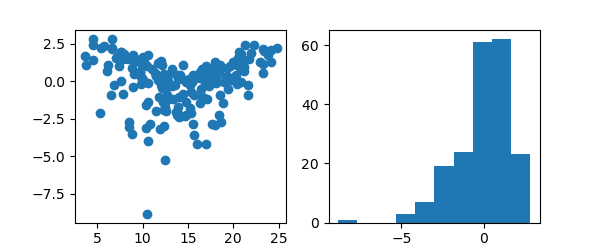

In [15]:
# look at the residuals
pred_val = lm.fittedvalues.copy()
true_val = data['sales'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(1,2,figsize=(6,2.5))
_ = ax[0].scatter(pred_val,residual)
_ = ax[1].hist(residual)



In [16]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper + TV*radio', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):          2.92e-144
Time:                        22:49:06   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7284      0.253     26.561      0.000       6.229       7.228
TV             0.0191      0.002     12.633      0.000       0.016       0.022
radio          0.0280      0.009      3.062      0.003       0.010       0.046
newspaper      0.0014      0.003      0.438      0.662      -0.005       0.008
TV:radio       0.0011   5.26e-05     20.686      0.000       0.001       0.001
==============================================================================
Omnibus:                      126.161   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.463
Skew:                          -2.291   Prob(JB):                    1.10e-244
Kurtosis:                      13.669   Cond. No.                     1.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

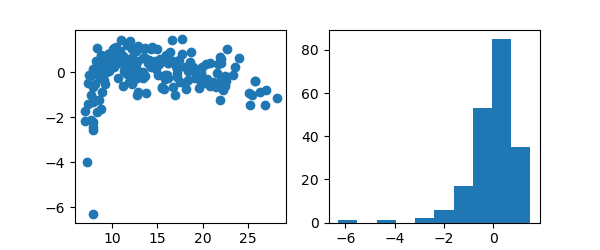

In [17]:
# look at the residuals
pred_val = lm.fittedvalues.copy()
true_val = data['sales'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(1,2,figsize=(6,2.5))
_ = ax[0].scatter(pred_val,residual)
_ = ax[1].hist(residual)



We see structure in the residual vs prediction plot

In [18]:
# prediction

predX=pd.DataFrame({'TV':[50], 'newspaper':[30], 'radio':[60]})

predictions=lm.get_prediction(predX)
predictions.summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,12.66658,0.278258,12.117799,13.215361,10.722849,14.61031


## Feature Selection

Try different models

In [19]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [20]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

## Umgang mit kategorialen Prädikatoren mit zwei Kategorien

Bisher hatten alle Prädiktoren numerische Werte. Was passiert, wenn einer kategorial wird?
Dafür kreieren wir eine Dummy-Variable (Größe des Popcorns).

In [21]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


Für scikit-learn muss der Datensatz numerisch vorliegen. Da das neue Feature nur zwei Ausprägungen haben kann, verwenden wir eine Dummy-Variable, die diese als Binärwerte darstellt. 

In [22]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Wir integrieren den **IsLarge** Prädikator in die Multiple Lineare Regression:

In [23]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.04571982092436275),
 ('radio', 0.18872814313427855),
 ('newspaper', -0.0010976794483516517),
 ('IsLarge', 0.05742385085482757)]

In [24]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper + IsLarge', data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           3.98e-95
Time:                        22:50:06   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9117      0.333      8.740      0.000       2.255       3.569
TV             0.0457      0.001     32.401      0.000       0.043       0.049
radio          0.1887      0.009     21.761      0.000       0.172       0.206
newspaper     -0.0011      0.006     -0.186      0.852      -0.013       0.011
IsLarge        0.0574      0.243      0.236      0.813      -0.422       0.537
==============================================================================
Omnibus:                       60.126   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.842
Skew:                          -1.323   Prob(JB):                     2.90e-33
Kurtosis:                       6.314   Cond. No.                         510.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""